# Feed Forward Neural Network


The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.  
https://archive.ics.uci.edu/ml/datasets/iris

## 1. Load libraries

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt

## 2. Load the Iris dataset

In [2]:
# Load dataset
iris_data = load_iris() 

# Check our data
print('Data Features:')
print(iris_data.feature_names)

print('Example data:')
print(iris_data.data[:5])

print('Example labels:')
print(iris_data.target[:5])

Data Features:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Example data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Example labels:
[0 0 0 0 0]


In [3]:
# Create X and Y sets
x = iris_data.data
y = iris_data.target.reshape(-1, 1) # Convert data to a single column

## 3. One Hot encode the class labels

In [4]:
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y)
print('OneHotEncoder: ')
print(y[[0, 50, 100]])

#Encodes the output as:
#Setosa,	Versicolor,	Virginica
#1		0			0
#0		1 		0
#0   	0 		1

OneHotEncoder: 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


## 4. Split the data for training and testing

In [5]:
# Split the data into 80-20%
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20)

## 5. Build the feedforward network model

In [6]:
# Create FFNN model
model = Sequential(name="Iris_FFNN")
model.add(Dense(10, input_shape=(4,), activation='relu', name='L1'))
model.add(Dense(10, activation='relu', name='L2'))
model.add(Dense(3, activation='softmax', name='Output'))

# Adam optimizer with learning rate of 0.001
optimizer = Adam(lr=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

## 6. Show the model architecture

In [7]:
model.summary()

Model: "Iris_FFNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
L1 (Dense)                   (None, 10)                50        
_________________________________________________________________
L2 (Dense)                   (None, 10)                110       
_________________________________________________________________
Output (Dense)               (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


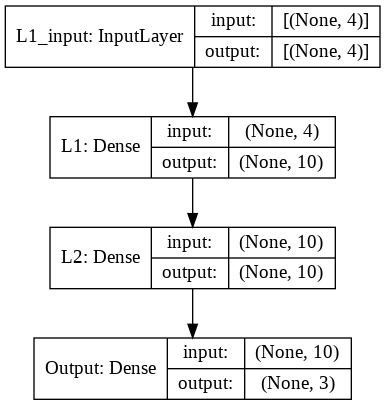

In [8]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## 7. Train model

In [9]:
print("Fit model on training data")
results = model.fit(train_x, train_y, batch_size=25, epochs=50, validation_data=(test_x, test_y), verbose=False)

Fit model on training data


## 8. Plot model results

In [10]:
# List all data in history
print(results.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


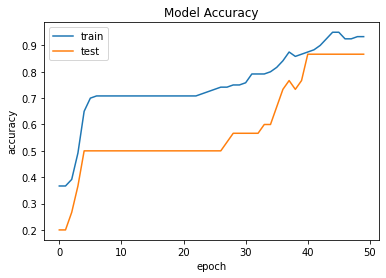

In [11]:
# Summarize history for accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

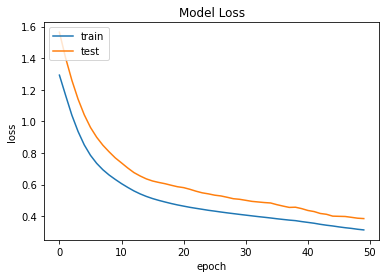

In [12]:
# Summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()